## Implementing Neural Network with MNIST data in python using tensorflow

#### In this jupyter notebook, I will build a 2-hidden-layer neural network in python that identifies handwritten digits. 

## Importing data

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("/tmp/data", one_hot= True) #convert the categorical labels into binary using one-hot encoding

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
type(mnist.train.images)

numpy.ndarray

In [7]:
mnist.train.images.shape       #actual dimensions

(55000, 784)

In [8]:
mnist.train.images[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
sample = mnist.train.images[2].reshape(28,28)    #flattened image

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

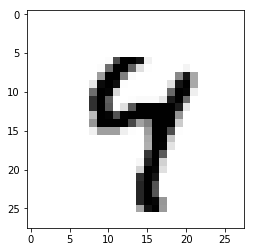

In [11]:
plt.imshow(sample, cmap='Greys')        #  how a random digit observation looks like

## Parameters
Parameter values for the data set

In [12]:
learning_rate = 0.001   # How quickly to adjust Learning rate
training_epochs = 15    #no. of training cycles we go through
batch_size = 100        #batches of training data
n_classes = 10          #no.of classes; goes from 0 to 9
n_samples = mnist.train.num_examples   #no. of samples

In [13]:
n_samples

55000

## Network Parameters
Parameters which will define our Neural Network

In [14]:
n_input = 784          # how the input will look like
n_hidden_1 = 256       # no. of neurons we want in our hidden layer 1
n_hidden_2 = 256       # no. of neurons we want in our hidden layer 2

## Model function
We receive the input data array and then to send it to the first hidden layer. Then the data will begin to have a weight attached to it between layers (this is initially a random value) and then sent to a node to undergo an activation function (along with a bias). Then it will continue on to the next hidden layer, and so on until the final output layer. In our case, we will just use two hidden layers, the more you use the longer the model will take to run (but it has more of an opportunity to possibly be more accurate on the training data).

Once the transformed "data" has reached the output layer we need to evaluate it. Here we will use a loss function (also called a cost function) to evaluate how far off we are from the desired result. In this case, how many of the classes we got correct.

Then we will apply an optimization function to minimize the cost (lower the error). This is done by adjusting weight values accordingly across the network. 

We can adjust how quickly to apply this optimization by changing our earlier learning rate parameter. The lower the rate the higher the possibility for accurate training results, but that comes at the cost of having to wait (physical time wise) for the results. Of course, after a certain point there is no benefit to lower the learning rate.

We'll start with 2 hidden layers, which use the RELU activation function, which is a very simple rectifier function which essentially either returns x or zero. For our final output layer we will use a linear activation with matrix multiplication:

In [15]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for Data Input
    weights: Dictionary of weights
    bias: Dictionary of bias values
    '''
    
    # First hidden layer with RELU Activation function
    
    # (X * W) + B
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    
    # RELU((X * W) + B) -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    
    # Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last output layer
    layer_out = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return layer_out

## Weights and Biases
We need to create two dictionaries containing our weight and bias objects for the model. We can use the tf.variable object type. This is different from a constant because TensorFlow's Graph Object becomes aware of the states of all the variables. A Variable is a modifiable tensor that lives in TensorFlow's graph of interacting operations. It can be used and even modified by the computation. From the documentation string:

A variable maintains state in the graph across calls to `run()`. You add a variable to the graph by constructing an instance of the class `Variable`.

The `Variable()` constructor requires an initial value for the variable, which can be a `Tensor` of any type and shape. The initial value defines the type and shape of the variable. After construction, the type and shape of the variable are fixed. The value can be changed using one of the assign methods.
We'll use tf's built-in random_normal method to create the random values for our weights and biases (you could also just pass ones as the initial biases).

In [46]:
weights = {
   # A matrix of Normally distributed values having n_input rows and n_hidden_1 columns
    'h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
    
}

In [17]:
biases = {
    'b1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([ n_classes]))
}

## Tensorflow graph input

In [18]:
x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])

In [19]:
pred = multilayer_perceptron(x, weights, biases)

## Cost and Optimization Functions

In [20]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [21]:
t = mnist.train.next_batch(1) # Returns a tuple of batch of n samples. Has sample and corresponding label

In [22]:
xSamp, ySamp = t

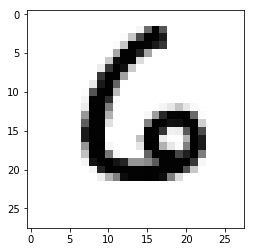

In [23]:
plt.imshow(xSamp.reshape(28,28), cmap= "Greys")   #xSample is the sample in consideration

In [24]:
ySamp   #ySamp is the actual label for the above digit.

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

## Run the session

In [25]:
sess =tf.InteractiveSession()   #Create an instance of interactive session

In [26]:
init = tf.global_variables_initializer()   #initialize all those tf.Variable objects we created earlier.

In [27]:
sess.run(init)  #Launch the session

In [28]:
# 15 loops: 
# The total data set is divided into 100 sets of 550 samples.
# So after the first 550 samples we calculate cost and try to reduce the cost by using the optimizer. 
# (Basically, Weight is updated after each 550 samples)

for epoch in range(training_epochs):
    
    # Cost 
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)    # 55000 / 100
    
    for i in range(total_batch):
        batch_x , batch_y = mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
        avg_cost +=  c/total_batch
        
    print("Epoch: {} cost{:.4f}".format(epoch+1, avg_cost))    
    
print ("Model has completed {} Epochs of training".format(training_epochs))    

Epoch: 1 cost184.3219
Epoch: 2 cost44.4450
Epoch: 3 cost27.9534
Epoch: 4 cost19.6880
Epoch: 5 cost14.2828
Epoch: 6 cost10.5597
Epoch: 7 cost7.9569
Epoch: 8 cost6.0842
Epoch: 9 cost4.6684
Epoch: 10 cost3.4835
Epoch: 11 cost2.5871
Epoch: 12 cost2.0625
Epoch: 13 cost1.5293
Epoch: 14 cost1.2647
Epoch: 15 cost1.1425
Model has completed 15 Epochs of training


## Model Evaluations

In [29]:
# Test model
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y,1))  # Gives a boolean array of correct and incorrect predictions

In [30]:
print (correct_predictions[0])    #the datatype is boolean

Tensor("strided_slice:0", shape=(), dtype=bool)


In [31]:
correct_predictions = tf.cast(correct_predictions, "float")

In [33]:
print (correct_predictions[0]) #datatype is now float so it becomes easy to calculate percentages

Tensor("strided_slice_2:0", shape=(), dtype=float32)


In [35]:
# To grab the mean of the elements across the tensor 
accuracy = tf.reduce_mean(correct_predictions)

In [38]:
print (type(accuracy))

<class 'tensorflow.python.framework.ops.Tensor'>


In [40]:
mnist.test.labels[0]   #a class observation of test data

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [42]:
mnist.test.images[0] 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Model Accuracy

Higher accuracy can be obtained by training more epochs. I have limited computational capability on my laptop and hence I decided to stick with lesser number of epochs.

In [47]:
print("Accuracy: ",accuracy.eval({x:mnist.test.images, y: mnist.test.labels}))

Accuracy:  0.946
